In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("used:", device, "-", torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import numpy as np

used: cuda - NVIDIA GeForce RTX 3060


In [2]:
classes = os.listdir('./Vegetable Images')
num_classes = len(classes)
classes

['Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Cucumber', 'Papaya', 'Pumpkin']

In [3]:
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

dataset = torchvision.datasets.ImageFolder(root='./Vegetable Images', transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=0)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=0)


classes = os.listdir('./Vegetable Images')

In [4]:
def imshow(img):
    img = img  / 2  + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

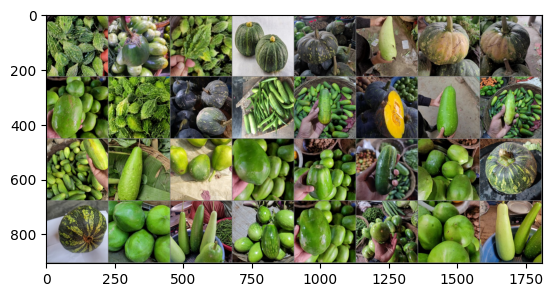

Bitter_Gourd Brinjal Bitter_Gourd Pumpkin Pumpkin Bottle_Gourd Pumpkin Pumpkin Papaya Bitter_Gourd Pumpkin Cucumber Cucumber Pumpkin Bottle_Gourd Cucumber Cucumber Bottle_Gourd Papaya Papaya Papaya Cucumber Papaya Pumpkin Pumpkin Papaya Bottle_Gourd Brinjal Papaya Brinjal Papaya Bottle_Gourd


In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [6]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 3).to(device)
        #32, 12, 222, 222
        self.pool1 = nn.MaxPool2d(4).to(device)
        #32, 12, 55, 55
        self.conv2 = nn.Conv2d(12, 32, 3).to(device)
        self.pool2 = nn.MaxPool2d(2).to(device)
        #32, 32, 53, 53
        self.fc1 = nn.Linear(32*53*53, 150).to(device)
        self.fc3 = nn.Linear(150, 6).to(device)
        
        self.tanh = nn.Tanh().to(device)

    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.tanh(x)
        
#         x = self.pool2(x)
        
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc3(x)
        return x
    
    def __str__(self):
        return "Net1"

net1 = Net1()

In [7]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 3).to(device)
        #32, 12, 222, 222
        self.pool1 = nn.MaxPool2d(2).to(device)
        #32, 12, 111, 111
        self.conv2 = nn.Conv2d(12, 32, 3).to(device)
        #32, 32, 109, 109
        self.pool2 = nn.MaxPool2d(2).to(device)
        #32, 32, 54, 54
        self.fc1 = nn.Linear(32*54*54, 150).to(device)
#         self.fc2 = nn.Linear(400, 150).to(device)
        self.fc3 = nn.Linear(150, 6).to(device)
        
        self.relu = nn.ReLU().to(device)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        
        x = self.pool2(x)
        
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.relu(x)
#         x = self.fc2(x)
        x = self.fc3(x)
        return x
    
    def __str__(self):
        return "Net2"

net2 = Net2()

In [8]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5).to(device)
        self.pool1 = nn.MaxPool2d(2).to(device) # 110
        
        self.conv2 = nn.Conv2d(12, 20, 5).to(device) # 106
        self.drop2 = nn.Dropout(p=0.25)
        
        self.conv3 = nn.Conv2d(20, 30, 5).to(device) # 101
        self.pool3 = nn.MaxPool2d(2).to(device) # 50
        self.drop3 = nn.Dropout(p=0.25)
        
        self.conv4 = nn.Conv2d(30, 64, 3).to(device) # 48
        self.pool4 = nn.MaxPool2d(2).to(device) # 24
        
        self.fc1 = nn.Linear(64*24*24, 200).to(device)
        self.fc2 = nn.Linear(200, 6).to(device)   
        
        self.relu = nn.ReLU().to(device)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.drop2(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool3(x)
        x = self.drop3(x)
        
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool4(x)
        
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
    def __str__(self):
        return "Net3"

net3 = Net3()

In [10]:
#Model training and saving best model
from torch.autograd import Variable

from torch.optim import Adam
models = [net1, net2, net3]#[net1, net2, net3]
criterion = nn.CrossEntropyLoss() # softmax inside

# Hyper-parameters 
num_epochs = 15
learning_rate = 0.001
weight_decay = 0.002 # L2 penalty
accs = {str(model): [] for model in models}

# Сделать чек, что лосс особо не меняется (например, через 2 эпохи разница не более 0.2)
# Хранить лучшую модель за все эпохи (лосс меньше всех)
delta = 0.2

for net_num, model in enumerate(models):
    model = model.to(device)
    best_model = None
    best_loss = 99999999999999.9
    best_epoch = -1
    prev2_loss = 0
    
    
    optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
    loss_function=nn.CrossEntropyLoss()

    best_accuracy=0.0

    for epoch in range(num_epochs):
    
        #Evaluation and training on training dataset
        model.train()
        train_accuracy=0.0
        train_loss=0.0
    
        for i, (images,labels) in enumerate(trainloader):
            if torch.cuda.is_available():
                images=Variable(images.cuda())
                labels=Variable(labels.cuda())
            
            optimizer.zero_grad()
        
            outputs=model(images)
            loss=loss_function(outputs,labels)
            loss.backward()
            optimizer.step()
        
        
            train_loss+= loss.cpu().data*images.size(0)
            _,prediction=torch.max(outputs.data,1)
        
            train_accuracy+=int(torch.sum(prediction==labels.data))
        
        train_accuracy=train_accuracy/train_size
        train_loss=train_loss/train_size
    
    
        # Evaluation on testing dataset
        model.eval()
    
        test_accuracy=0.0
        for i, (images,labels) in enumerate(testloader):
            if torch.cuda.is_available():
                images=Variable(images.cuda())
                labels=Variable(labels.cuda())
            
            outputs=model(images)
            _,prediction=torch.max(outputs.data,1)
            test_accuracy+=int(torch.sum(prediction==labels.data))
    
        test_accuracy=test_accuracy/test_size
        accs[str(model)].append(test_accuracy)
    
    
        print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
        #Save the best model
        if test_accuracy>best_accuracy:
            PATH = f'./cnn{model}.pth'
            torch.save(model.state_dict(), PATH)
#             torch.save(model.state_dict(),'best_checkpoint.model')
            best_accuracy=test_accuracy

Epoch: 0 Train Loss: tensor(0.9915) Train Accuracy: 0.6885416666666667 Test Accuracy: 0.875
Epoch: 1 Train Loss: tensor(0.4089) Train Accuracy: 0.8697916666666666 Test Accuracy: 0.8833333333333333
Epoch: 2 Train Loss: tensor(0.3171) Train Accuracy: 0.9057291666666667 Test Accuracy: 0.9229166666666667
Epoch: 3 Train Loss: tensor(0.2714) Train Accuracy: 0.9199652777777778 Test Accuracy: 0.91875
Epoch: 4 Train Loss: tensor(0.2643) Train Accuracy: 0.9217013888888889 Test Accuracy: 0.9034722222222222
Epoch: 5 Train Loss: tensor(0.2729) Train Accuracy: 0.9194444444444444 Test Accuracy: 0.8916666666666667
Epoch: 6 Train Loss: tensor(0.2762) Train Accuracy: 0.915625 Test Accuracy: 0.8840277777777777
Epoch: 7 Train Loss: tensor(0.3077) Train Accuracy: 0.8963541666666667 Test Accuracy: 0.8784722222222222
Epoch: 8 Train Loss: tensor(0.3260) Train Accuracy: 0.8935763888888889 Test Accuracy: 0.8722222222222222
Epoch: 9 Train Loss: tensor(0.3508) Train Accuracy: 0.8831597222222223 Test Accuracy: 0.8

In [12]:
def accforcnn():
    # Подготовка
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            # собираем правильные прогнозы для каждого класса
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                    correct += 1
                total_pred[classes[label]] += 1
                total += 1

    print(f'Accuracy of the network on test images: {100 * correct // total} %')
    # Выводим точность на каждом классе
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class:{correct_count} / {total_pred[classname]} {classname:5s} is {accuracy:.1f} %')

In [13]:
net1, net2, net3 = Net1(), Net2(), Net3()
models = [net1, net2, net3]
for i, model in enumerate(models):
    PATH = f'./cnn{model}.pth'
    model.load_state_dict(torch.load(PATH))
    model.eval()
    accforcnn()

Accuracy of the network on test images: 92 %
Accuracy for class:224 / 233 Bitter_Gourd is 96.1 %
Accuracy for class:237 / 260 Bottle_Gourd is 91.2 %
Accuracy for class:195 / 227 Brinjal is 85.9 %
Accuracy for class:221 / 231 Cucumber is 95.7 %
Accuracy for class:232 / 256 Papaya is 90.6 %
Accuracy for class:220 / 233 Pumpkin is 94.4 %
Accuracy of the network on test images: 97 %
Accuracy for class:229 / 233 Bitter_Gourd is 98.3 %
Accuracy for class:254 / 260 Bottle_Gourd is 97.7 %
Accuracy for class:217 / 227 Brinjal is 95.6 %
Accuracy for class:218 / 231 Cucumber is 94.4 %
Accuracy for class:253 / 256 Papaya is 98.8 %
Accuracy for class:228 / 233 Pumpkin is 97.9 %
Accuracy of the network on test images: 96 %
Accuracy for class:219 / 233 Bitter_Gourd is 94.0 %
Accuracy for class:258 / 260 Bottle_Gourd is 99.2 %
Accuracy for class:210 / 227 Brinjal is 92.5 %
Accuracy for class:223 / 231 Cucumber is 96.5 %
Accuracy for class:251 / 256 Papaya is 98.0 %
Accuracy for class:229 / 233 Pumpkin

In [14]:
from torchvision import models as torchmodels

In [15]:
alexmodel = torchmodels.alexnet(pretrained=True)

c:\pyneuro\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\pyneuro\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
for param in model.parameters():
    param.requires_grad = False

In [17]:
alexmodel.train(True)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=6, bias=True)
)

In [18]:
from torch.optim import Adam
from torch.autograd import Variable
criterion = nn.CrossEntropyLoss()

# Hyper-parameters 
num_epochs = 15
learning_rate = 0.001
accs_alex = []

model = model.to(device)
best_alex_model = None
best_loss = 99999999999999.9
best_epoch = -1

optimizer=Adam(alexmodel.classifier.parameters(), lr=learning_rate)
loss_function=nn.CrossEntropyLoss()

best_accuracy=0.0

for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    alexmodel.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(trainloader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=alexmodel(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_size
    train_loss=train_loss/train_size
    
    
    # Evaluation on testing dataset
    alexmodel.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(testloader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_size
    accs_alex.append(test_accuracy)
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    #Save the best model
    if test_accuracy>best_accuracy:
        PATH = f'./cnnAlex.pth'
        torch.save(alexmodel.state_dict(), PATH)
#            torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy
print(f'Finished Training AlexNet. Best epoch: {best_epoch+1}')

Epoch: 0 Train Loss: tensor(0.1411) Train Accuracy: 0.9557291666666666 Test Accuracy: 0.9652777777777778
Epoch: 1 Train Loss: tensor(0.0037) Train Accuracy: 0.9994791666666667 Test Accuracy: 0.9652777777777778
Epoch: 2 Train Loss: tensor(0.0009) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 3 Train Loss: tensor(0.0005) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 4 Train Loss: tensor(0.0004) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 5 Train Loss: tensor(0.0003) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 6 Train Loss: tensor(0.0002) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 7 Train Loss: tensor(0.0002) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 8 Train Loss: tensor(0.0002) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 9 Train Loss: tensor(0.0001) Train Accuracy: 1.0 Test Accuracy: 0.9652777777777778
Epoch: 10 Train Loss: tensor(0.0001) Train Accuracy: 1.0 Test Accuracy

In [19]:
accforcnn()

Accuracy of the network on test images: 96 %
Accuracy for class:219 / 233 Bitter_Gourd is 94.0 %
Accuracy for class:258 / 260 Bottle_Gourd is 99.2 %
Accuracy for class:210 / 227 Brinjal is 92.5 %
Accuracy for class:223 / 231 Cucumber is 96.5 %
Accuracy for class:251 / 256 Papaya is 98.0 %
Accuracy for class:229 / 233 Pumpkin is 98.3 %


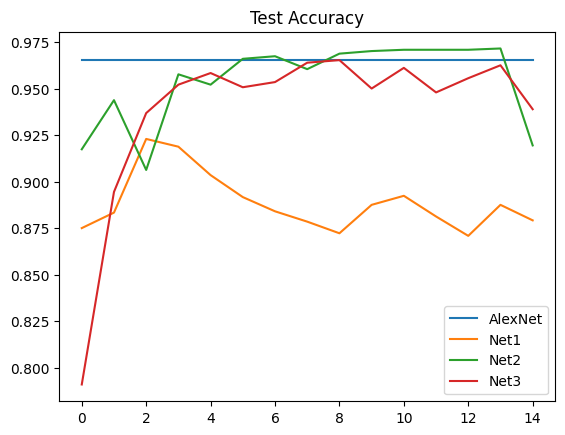

In [20]:
plt.plot(accs_alex, label="AlexNet")
plt.plot(accs["Net1"], label="Net1")
plt.plot(accs["Net2"], label="Net2")
plt.plot(accs["Net3"], label="Net3")
plt.legend()
plt.title("Test Accuracy")
plt.show()
plt.close()

In [21]:
PATH = f'./alex.pth'
save = False
if save:
    torch.save(best_alex_model, PATH)
else:
    alexmodel.load_state_dict(torch.load(PATH))
    alexmodel.eval()

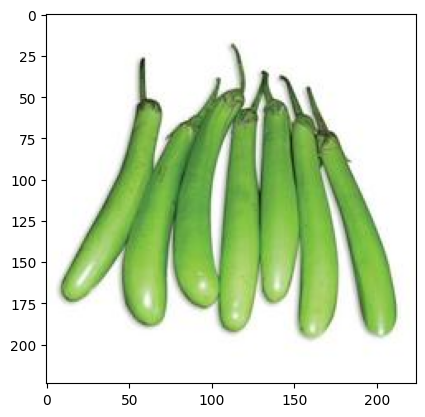

Net1 says: it is bitter
Net2 says: it is papaya
Net3 says: it is papaya


In [22]:
from PIL import Image
import requests
from io import BytesIO
from resizeimage import resizeimage

#url = "https://theanimalw.com/wp-content/uploads/2016/03/416.jpg"
#url = "http://cdn.shopify.com/s/files/1/0278/2307/9508/products/Phase1-42.jpg?v=1676295981"
url = "https://healthybuddha.in/image/cache/catalog/9BrinjalLong-500x515.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/a/a2/Courge_encore_verte.jpg"
#url = "https://cdn.shopify.com/s/files/1/0608/1554/0456/products/green-brinjal-eggplant_1024x1024.jpg?v=1662812816"


response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = resizeimage.resize_cover(img, [224, 224])
path = "./check/noclass/1.jpg"
img.save(path)

check_ds = torchvision.datasets.ImageFolder(root='./check', transform=transform)
checkloader = torch.utils.data.DataLoader(check_ds, batch_size=1, num_workers=0)

classes = ("bitter", "bottle", "brinjal", "cucumber", "papaya", "pumpkin")

image, label = next(iter(checkloader))
imshow(torchvision.utils.make_grid(image.cpu()))

for model in models:
    with torch.no_grad():
        #for data in checkloader:
        image, label = image.to(device), label.to(device)
        # рассчитываем выходные данные, пропуская изображения через сеть
        output = model(image)

        predict_num = np.argmax(output.cpu())
        print(f"{model} says: it is {classes[predict_num]}")